In [21]:
#importing the required modules
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import seaborn as sns
%matplotlib inline

In [22]:
#reading the dataset into a dataframe
df=pd.read_csv("avocado_unclean.csv")

In [23]:
#printing of unclean dataset
print(df)

       Unnamed: 0        Date  AveragePrice  Total Volume       4046  \
0               0  27-12-2015          1.33      64236.62    1036.74   
1               1  20-12-2015          1.35           NaN     674.28   
2               2  13-12-2015          0.93           NaN     794.70   
3               3  06-12-2015          1.08      78992.15    1132.00   
4               4  29-11-2015          1.28           NaN     941.48   
5               5  22-11-2015          1.26      55979.78    1184.27   
6               6  15-11-2015          0.99      83453.76    1368.92   
7               7  08-11-2015          0.98           NaN     703.75   
8               8  01-11-2015          1.02      99811.42    1022.15   
9               9  25-10-2015          1.07      74338.76     842.40   
10             10  18-10-2015          1.12      84843.44     924.86   
11             11  11-10-2015          1.28      64489.17    1582.03   
12             12  04-10-2015          1.31      61007.10    226

In [24]:
#finding the numberof missing values in each column
df.apply(lambda x: sum(x.isnull()),axis=0)

Unnamed: 0        0
Date              0
AveragePrice      0
Total Volume     69
4046              0
4225              0
4770              0
Total Bags        0
Small Bags        0
Large Bags        0
XLarge Bags     115
type             73
year              0
region           87
dtype: int64

In [25]:
#data cleaning
#numerical values of total volume have been replaced by mean
#numerical values of Xlarge Bags have been replaced by median as they contain outliers
#catogorical values of type, region have been replced with the previous value in the column
df["Total Volume"].fillna(df["Total Volume"].mean(),inplace=True)
df["XLarge Bags"].fillna(df["XLarge Bags"].mean(),inplace=True)
df["type"].fillna(method="bfill",inplace=True)
df["region"].fillna(method="bfill",inplace=True)
# to verify that n more null values exist in the dataset
df.apply(lambda x: sum(x.isnull()),axis=0)

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [26]:
#printing the clean dataset
print(df)

       Unnamed: 0        Date  AveragePrice  Total Volume       4046  \
0               0  27-12-2015          1.33  6.423662e+04    1036.74   
1               1  20-12-2015          1.35  8.509533e+05     674.28   
2               2  13-12-2015          0.93  8.509533e+05     794.70   
3               3  06-12-2015          1.08  7.899215e+04    1132.00   
4               4  29-11-2015          1.28  8.509533e+05     941.48   
5               5  22-11-2015          1.26  5.597978e+04    1184.27   
6               6  15-11-2015          0.99  8.345376e+04    1368.92   
7               7  08-11-2015          0.98  8.509533e+05     703.75   
8               8  01-11-2015          1.02  9.981142e+04    1022.15   
9               9  25-10-2015          1.07  7.433876e+04     842.40   
10             10  18-10-2015          1.12  8.484344e+04     924.86   
11             11  11-10-2015          1.28  6.448917e+04    1582.03   
12             12  04-10-2015          1.31  6.100710e+04    226

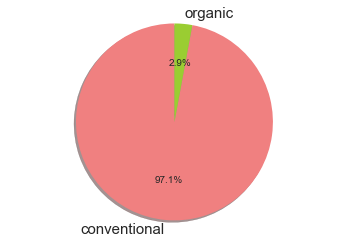

In [27]:
#organic vs conventional pie chart

Type=df.groupby('type')['Total Volume'].agg('sum')

values=[Type['conventional'],Type['organic']]
labels=['conventional','organic']
colors=['lightcoral','yellowgreen']

plt.pie(values,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True, startangle=90)
plt.axis('equal')
plt.show()

C:\Users\Sharanya\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0.5,1,'Average price distribution plot')]

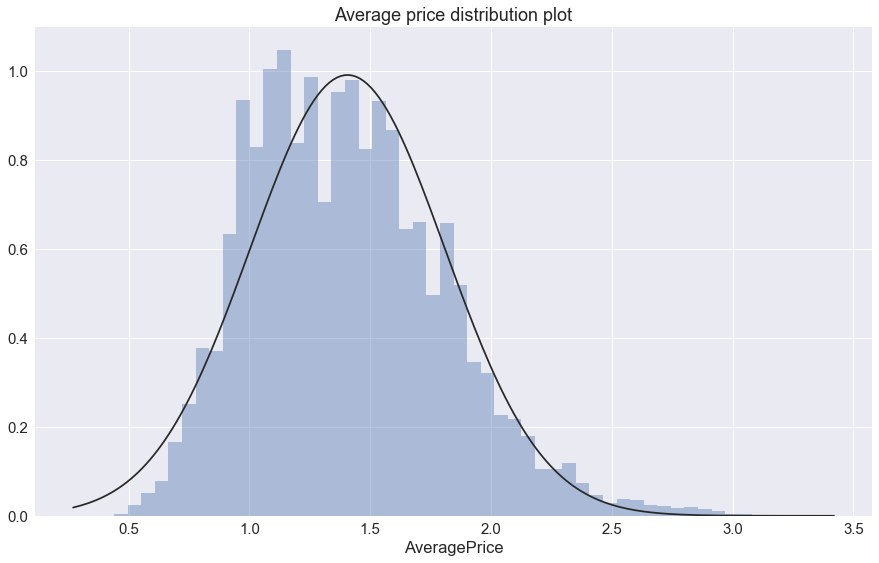

In [28]:
#average price distribution

sns.set(font_scale=1.5) 
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15, 9))
sns.distplot(a=df.AveragePrice, kde=False, fit=norm)
ax.set(title="Average price distribution plot")

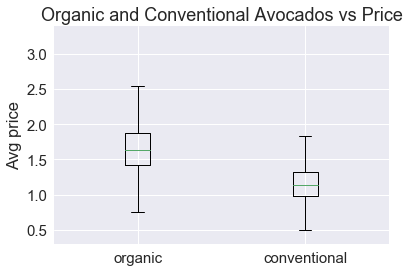

In [29]:
#type vs avg price box plot
objects = ['organic','conventional']
plt.boxplot([df[df.type == "organic"].AveragePrice,df[df.type == "conventional"].AveragePrice])
plt.xticks([1,2],objects)
plt.ylabel("Avg price")
plt.title("Organic and Conventional Avocados vs Price")
plt.show()

Text(0,0.5,'Total Volume')

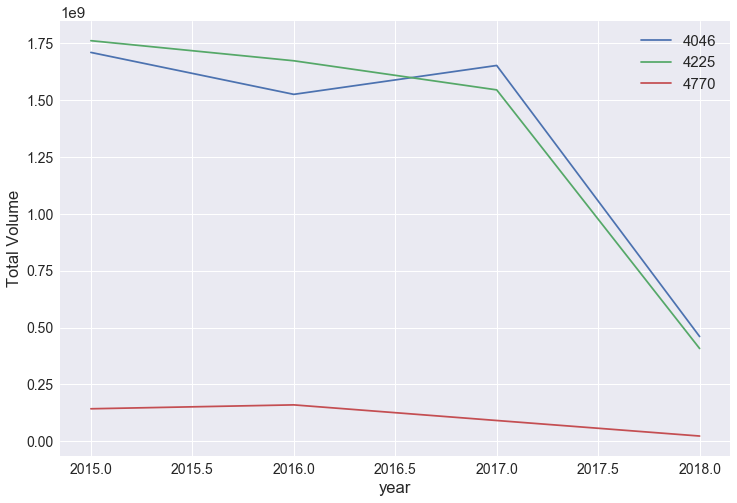

In [30]:
#comparing production of different kinds of avacados (4046,4225,4770) vs year

variant = df[['4046', '4225', '4770']].groupby(df.year).sum()
variant.plot(kind='line', fontsize = 14, figsize=(12,8))
plt.ylabel("Total Volume")

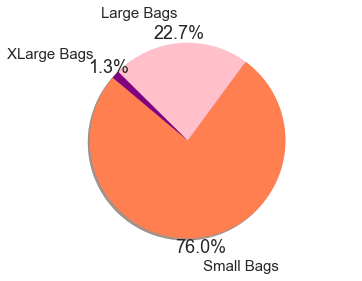

In [31]:
labels=['Small Bags', 'Large Bags', 'XLarge Bags']
lol=[df["Small Bags"].mean(),df["Large Bags"].mean(),df["XLarge Bags"].mean()]
colors=['coral','pink','purple']
plt.pie(lol,labels=labels, colors=colors,
        autopct='%1.1f%%', pctdistance=1.1,labeldistance=1.3, shadow=True, startangle=140)
 
plt.axis('equal')

plt.show()

[Text(0,0.5,'States'),
 Text(0.5,0,'Percentage of Races'),
 Text(0.5,1,"Percentage of State's Size of Bags")]

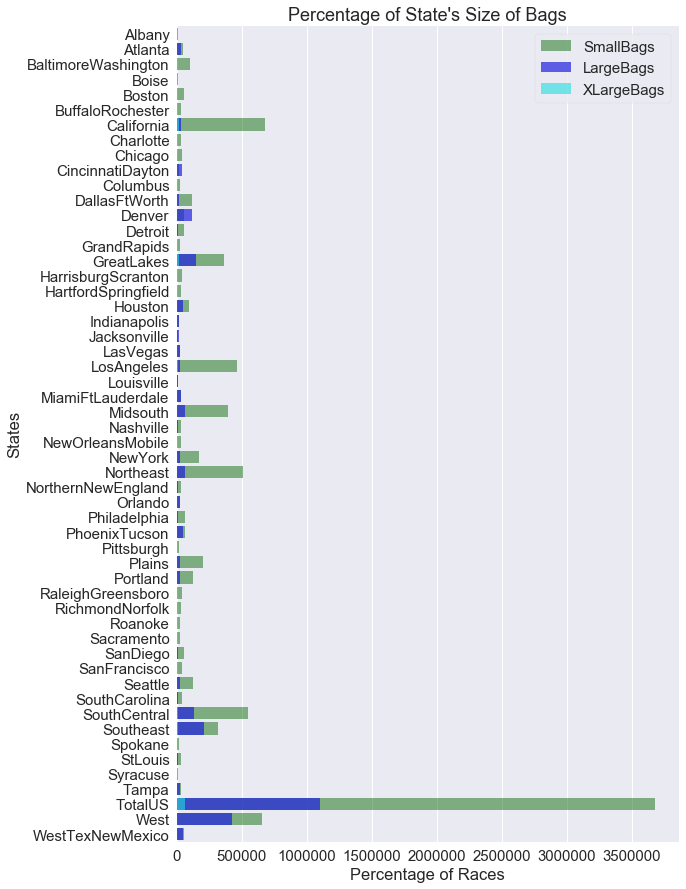

In [32]:
# comparing small and large bags per region
area_list=list(df.region.unique())
SmallBags=[]
LargeBags=[]
XLargeBags=[]

for i in area_list:
    x=df[df.region==i]
    SmallBags.append(sum(x['Small Bags'])/len(x))
    LargeBags.append(sum(x['Large Bags'])/len(x))
    XLargeBags.append(sum(x['XLarge Bags'])/len(x))
    
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x=SmallBags,y=area_list,color='green',alpha = 0.5,label='SmallBags' )
sns.barplot(x=LargeBags,y=area_list,color='blue',alpha = 0.7,label='LargeBags')
sns.barplot(x=XLargeBags,y=area_list,color='cyan',alpha = 0.6,label='XLargeBags')
ax.legend(loc='upper right',frameon = True)     # legendlarin gorunurlugu
ax.set(xlabel='Percentage of Races', ylabel='States',title = "Percentage of State's Size of Bags")

Text(0.5,1,'Average Price of Avocado According to Region')

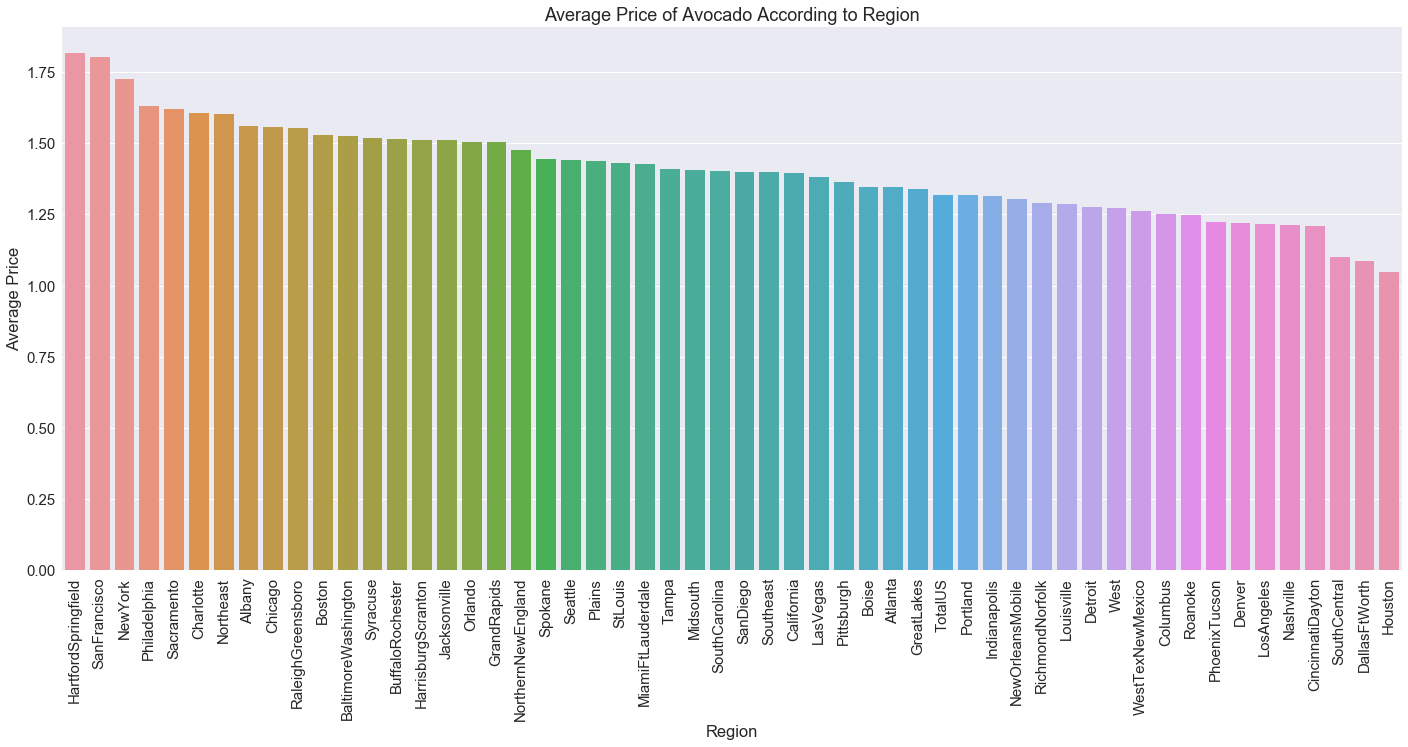

In [33]:
#regions vs avg price bar chart

region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

Text(0.5,1,'Average of Total Volume According to Region')

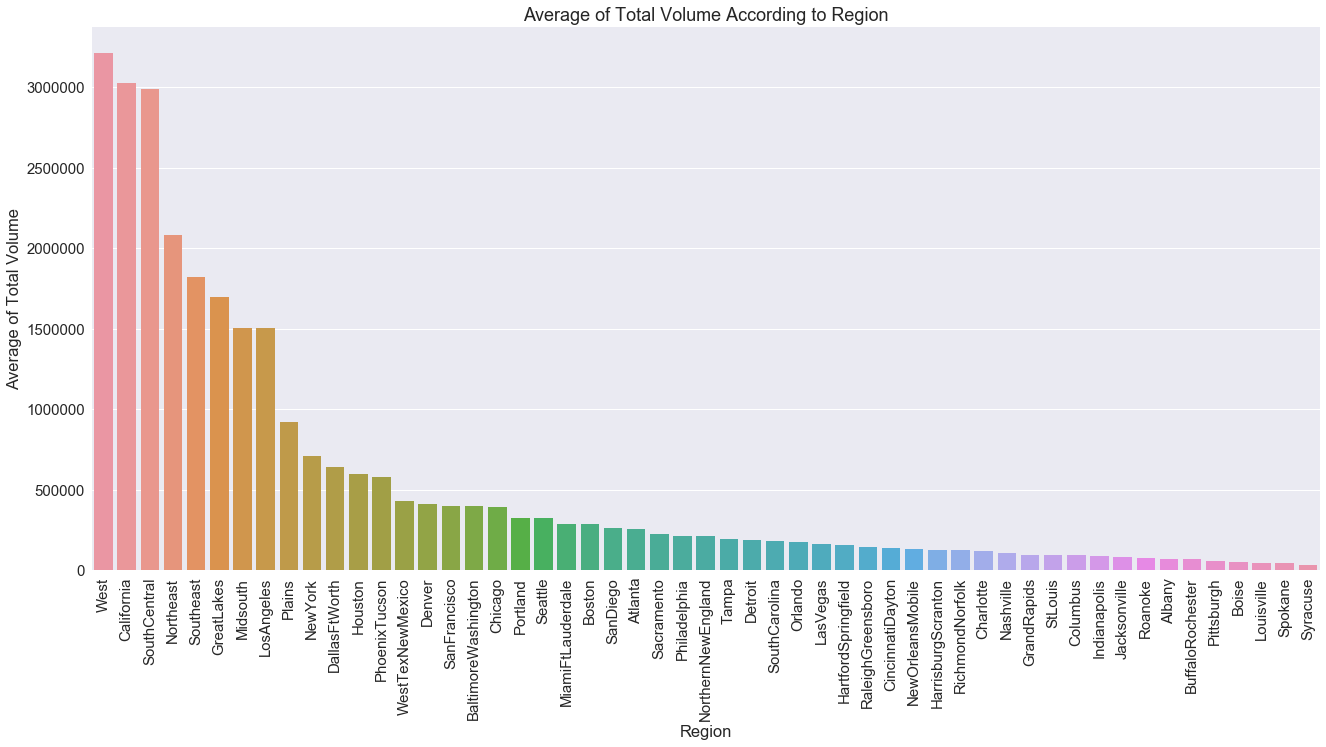

In [34]:
filter1=df.region!='TotalUS'
df1=df[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')

In [35]:
#hypothesis testing
array= ['organic']
years = [2017, 2018]
df.loc[(df['region'] == 'California') & df['type'].isin(array) & df['year'].isin(years)].to_csv('Cali_org.csv')

In [38]:
cali_df= pd.read_csv("Cali_org.csv")
samples = cali_df.sample(n=40,replace=True)
samples.to_csv('Sample.csv')

In [39]:
arr_2017=samples.loc[samples['year'] == 2017]
sigma = arr_2017.iloc[:,4].std() #standard deviation
print(sigma)
mean_2017=arr_2017.iloc[:,4].mean() #mean of all the total volume values of California's organic avacados in 2017
mu = mean_2017 + (0.2*mean_2017)

arr_2018 = samples.loc[samples['year'] == 2018]
x_bar = arr_2018.iloc[:,4].mean() #x_bar is the mean of total volume values of California's organic avacados in 2018

z_score = (x_bar - mu)/(sigma/math.sqrt(40))
print(z_score)
p_per = scipy.stats.norm.sf(abs(z_score)) * 100
print(p_per)

26666.22446253824
6.7383814545518765
8.008032421596043e-10


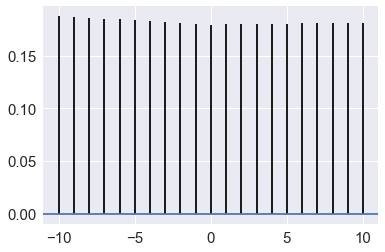

In [40]:
# correlation
np.correlate(df['AveragePrice'], df['Total Volume'])
lines=plt.xcorr(df['AveragePrice'],df['Total Volume'])
plt.grid(True)
plt.show()

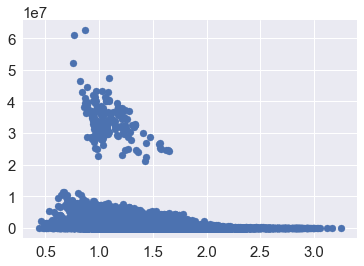

In [41]:
plt.scatter(df['AveragePrice'],df['Total Volume'])

In [42]:
np.corrcoef(df['AveragePrice'],df['Total Volume'])

array([[ 1.        , -0.19252068],
       [-0.19252068,  1.        ]])

In [43]:
np.corrcoef(df['Total Bags'],df['Total Volume'])

array([[1.        , 0.96257938],
       [0.96257938, 1.        ]])

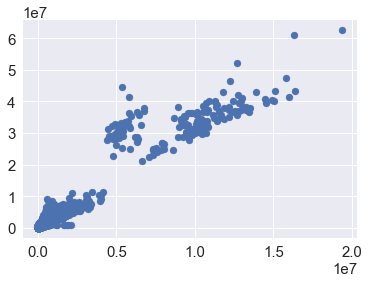

In [44]:
plt.scatter(df['Total Bags'],df['Total Volume'])

In [45]:
np.corrcoef(df['AveragePrice'],df['Large Bags'])

array([[ 1.        , -0.17294001],
       [-0.17294001,  1.        ]])

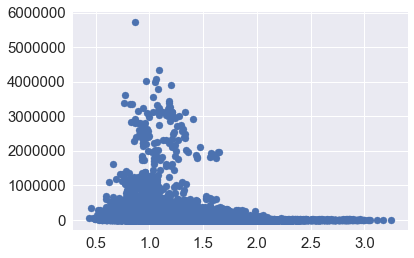

In [46]:
plt.scatter(df['AveragePrice'],df['Large Bags'])